# Analyse

Nous allons maintenant créer des clusters parmis les pays. 

Nous procéderons d'abord à une classification hiérarchique, puis nous formerons des clusters à l'aide de la méthode du Kmeans et nous ferons une ACP afin de visualiser les pays sur 2 et 3 dimensions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
folder = 'D:/Data_Analyst_Projet/Projet 9/Donnees/fichier analyse/'

In [4]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_row', 150)
sns.set()

## Import fichiers

In [5]:
df = pd.read_csv(folder+'pays_knn.csv')
df.head()

pays  exportation_volaille  importation_volaille  production  \
0  Afrique du Sud                 63.00            514,000.00    1,667.00   
1         Albanie                  0.00             38,000.00       13.00   
2         Algérie                  0.00              2,000.00      275.00   
3       Allemagne                646.00            842,000.00    1,514.00   
4          Angola                  0.00            277,000.00       42.00   

   volaille_consommée  taux_dependance  taux_autosuffisance  \
0        2,035,000.00             0.24                 0.79   
1           47,000.00             0.81                 0.28   
2          264,000.00             0.01                 0.99   
3        1,609,000.00             0.48                 0.87   
4          315,000.00             0.87                 0.13   

   proportion_volaille_nourriture  proportion_animaux_nourriture  \
0                            0.06                           0.12   
1                            0.01                           0.05   
2                            0.01                           0.03   
3                            0.02                           0.10   
4                            0.02                           0.07   

     population  accroissement_population_moyen_par_annee  \
0 57,009,756.00                                674,990.00   
1  2,884,169.00                                -12,973.84   
2 41,389,189.00                                588,745.95   
3 82,658,409.00                                 90,712.42   
4 29,816,766.00                                758,648.11   

   taux_accroissement_population_moyen  lpi                  pib  \
0                                 0.01 3.57   381,448,814,653.46   
1                                -0.00 2.56    13,019,689,336.69   
2                                 0.01 2.52   170,097,014,589.13   
3                                 0.00 4.13 3,690,849,152,517.65   
4                                 0.03 2.24    68,972,769,395.63   

   taux_droit_douane  quantite_conteneurs_par_annee  cout_production_volaille  \
0               4.44                   4,563,618.00                  2,016.60   
1               1.43                     118,270.00                  1,940.26   
2               9.28                   1,725,238.00                  2,180.70   
3               1.81                  15,169,595.00                  1,459.50   
4               8.52                     570,200.00                  2,756.36   

   taux_population_urbaine  stabilite_politique  pib_par_habitant  
0                     0.66                -0.28          6,690.94  
1                     0.60                 0.38          4,514.19  
2                     0.72                -0.92          4,109.70  
3                     0.77                 0.59         44,651.83  
4                     0.65                -0.33          2,313.22

In [6]:
df2 = pd.read_csv(folder+'pays.csv')
df2.head()

pays  exportation_volaille  importation_volaille  production  \
0  Afrique du Sud                 63.00            514,000.00    1,667.00   
1         Albanie                  0.00             38,000.00       13.00   
2         Algérie                  0.00              2,000.00      275.00   
3       Allemagne                646.00            842,000.00    1,514.00   
4          Angola                  0.00            277,000.00       42.00   

   volaille_consommée  taux_dependance  taux_autosuffisance  \
0        2,035,000.00             0.24                 0.79   
1           47,000.00             0.81                 0.28   
2          264,000.00             0.01                 0.99   
3        1,609,000.00             0.48                 0.87   
4          315,000.00             0.87                 0.13   

   proportion_volaille_nourriture  proportion_animaux_nourriture  \
0                            0.06                           0.12   
1                            0.01                           0.05   
2                            0.01                           0.03   
3                            0.02                           0.10   
4                            0.02                           0.07   

     population  accroissement_population_moyen_par_annee  \
0 57,009,756.00                                674,990.00   
1  2,884,169.00                                -12,973.84   
2 41,389,189.00                                588,745.95   
3 82,658,409.00                                 90,712.42   
4 29,816,766.00                                758,648.11   

   taux_accroissement_population_moyen  lpi                  pib  \
0                                 0.01 3.57   381,448,814,653.46   
1                                -0.00 2.56    13,019,689,336.69   
2                                 0.01 2.52   170,097,014,589.13   
3                                 0.00 4.13 3,690,849,152,517.65   
4                                 0.03 2.24    68,972,769,395.63   

   taux_droit_douane  taux_population_urbaine  stabilite_politique  \
0               4.44                     0.66                -0.28   
1               1.43                     0.60                 0.38   
2               9.28                     0.72                -0.92   
3               1.81                     0.77                 0.59   
4               8.52                     0.65                -0.33   

   pib_par_habitant  
0          6,690.94  
1          4,514.19  
2          4,109.70  
3         44,651.83  
4          2,313.22

In [7]:
# on garde uniquement les données numériques pour l'analyse 
X = df.drop(columns='pays')

In [8]:
# pays dans une variable array
pays = df['pays'].values

In [9]:
# indicateur dans une variable array
variables = X.columns.values

In [10]:
X.shape[0]

132

## Classification hiérarchique

In [11]:
# On centre et on réduit l'échantillon pour s'assurer que chaque variable aura la même incidence sur la classification
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# mesure les liens entre les clusters avec la méthode de ward
# chaque fois que 2 clusters sont regroupés, cherche à minimiser l'inertie intraclasse

Z = linkage(X_scaled, 'ward')

In [ ]:
# faire random sample echantillon de 30 pays
# faire plusieurs itération pour valider les clusters

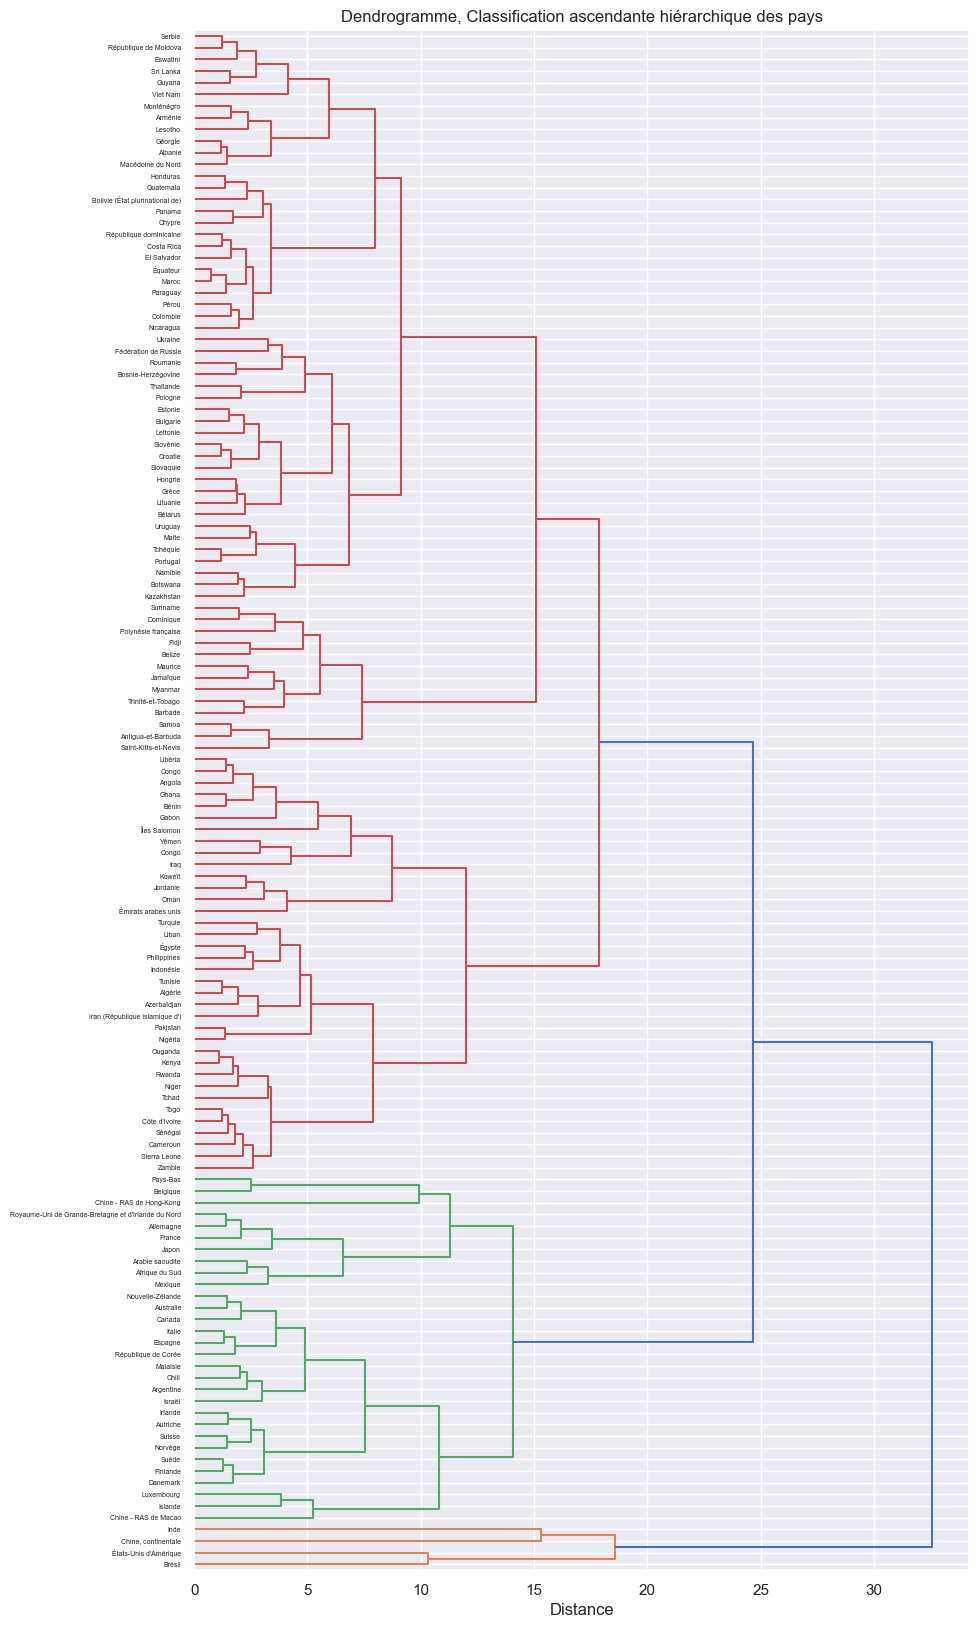

In [13]:
# création du dendogramme
plt.figure(figsize=(10,20))
dendrogram(Z, p=X.shape[0], truncate_mode='lastp', distance_sort='ascending', orientation='right', labels=pays)
plt.title("Dendrogramme, Classification ascendante hiérarchique des pays")
plt.xlabel('Distance')
plt.show();

In [14]:
# création de la classification
cah = AgglomerativeClustering(n_clusters=3, linkage='ward')

cah = cah.fit(X_scaled)

In [15]:
df.columns

Index(['pays', 'exportation_volaille', 'importation_volaille', 'production',
       'volaille_consommée', 'taux_dependance', 'taux_autosuffisance',
       'proportion_volaille_nourriture', 'proportion_animaux_nourriture',
       'population', 'accroissement_population_moyen_par_annee',
       'taux_accroissement_population_moyen', 'lpi', 'pib',
       'taux_droit_douane', 'quantite_conteneurs_par_annee',
       'cout_production_volaille', 'taux_population_urbaine',
       'stabilite_politique', 'pib_par_habitant'],
      dtype='object')

In [16]:
colonne = ['taux_dependance', 'lpi', 'pib_par_habitant', 'population', 'stabilite_politique', 'clusters_cah']

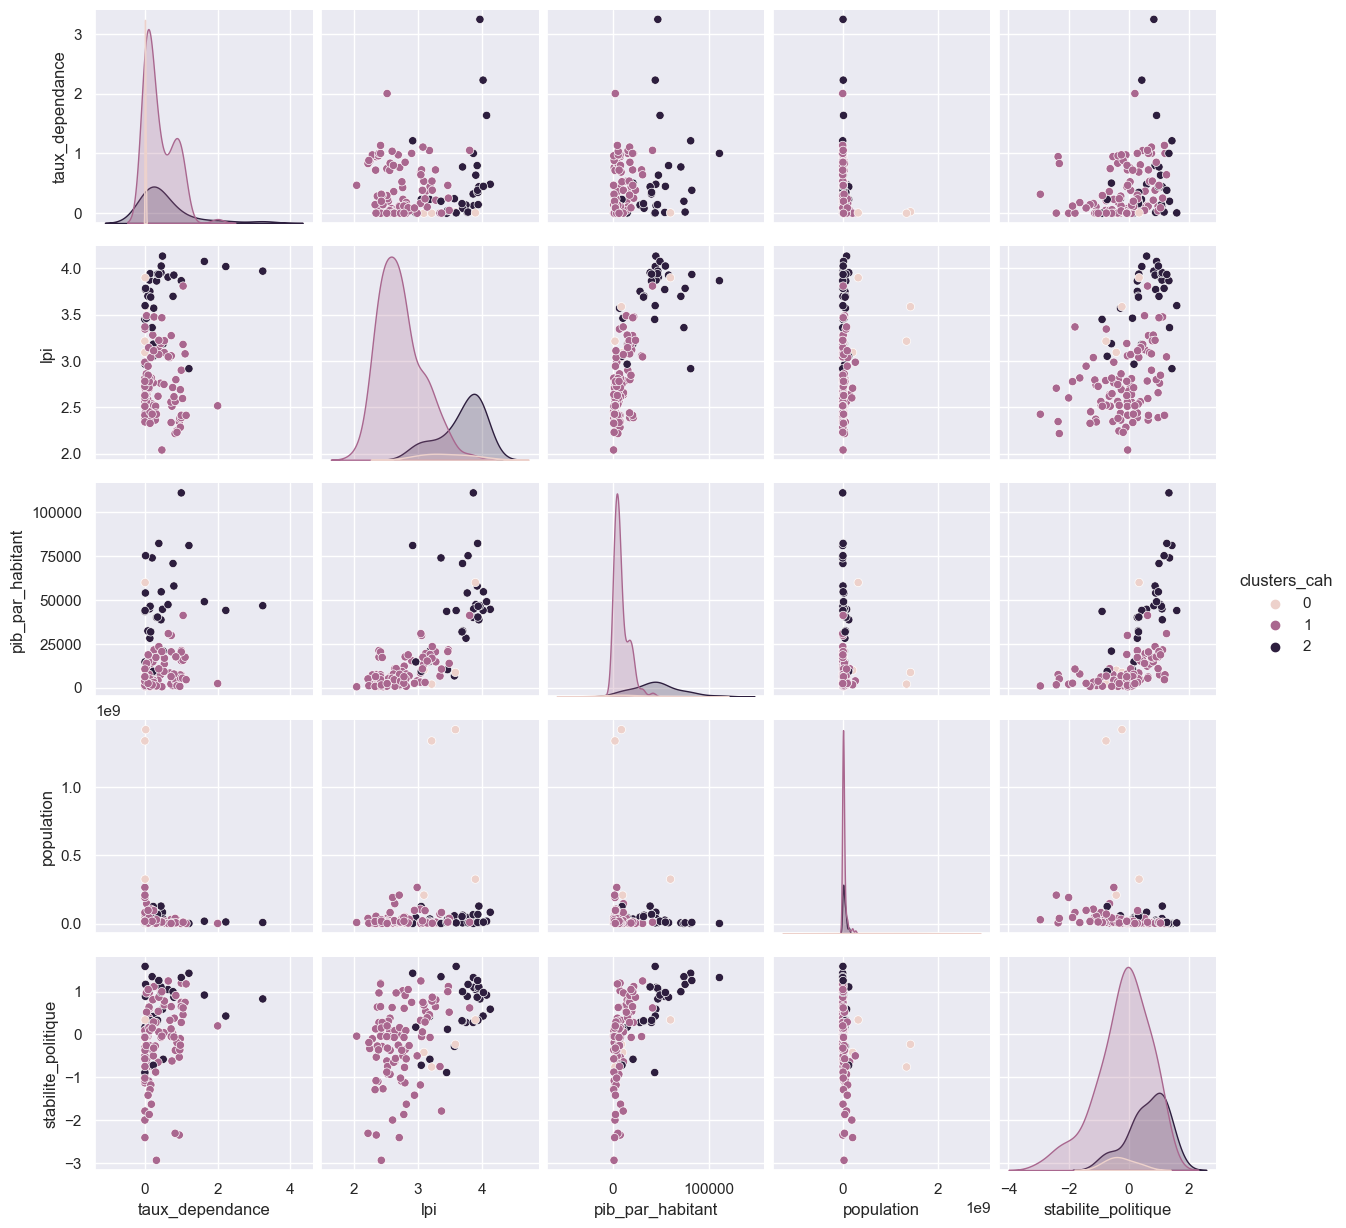

In [17]:
# création des clusters
clusters_cah = cah.labels_

df['clusters_cah'] = clusters_cah
sns.pairplot(df[colonne], hue='clusters_cah')
plt.show()

## Kmeans

#### Méthode du coude avec standardisation

Text(0.5, 0, 'Nombre de clusters')

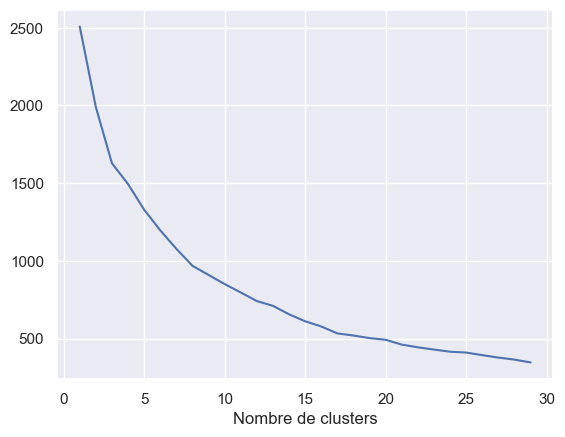

In [18]:
# méthode du coude pour déterminer le nombre de clusters le plus pertinents
warnings.simplefilter('ignore')

liste_clusters = []

for n in range(1,30):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X_scaled)
    liste_clusters.append(kmeans.inertia_)

plt.plot(range(1,30), liste_clusters)
plt.xlabel('Nombre de clusters')

Avec standardisation pas de coude visible.

#### Méthode du coude sans standardisation

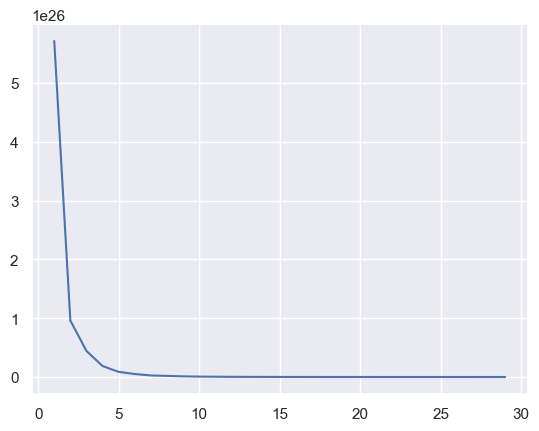

In [19]:
# méthode du coude pour déterminer le nombre de clusters le plus pertinents
warnings.simplefilter('ignore')

liste_clusters = []

for n in range(1,30):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    liste_clusters.append(kmeans.inertia_)

plt.plot(range(1,30), liste_clusters)

Sans standardisation, on peut voir un coude pour 2, 3, 4 et 5 clusters.

Pour la première itération on prendra 3 clusters.

In [20]:
# création de l'estimateur

kmeans = KMeans(n_clusters=3)

kmeans = kmeans.fit(X_scaled)

In [21]:
# coordonnées des centroides

centroides = kmeans.cluster_centers_

In [22]:
# clusters de l'echantillon

clusters_kmeans = kmeans.labels_
df['clusters_kmeans']=clusters_kmeans

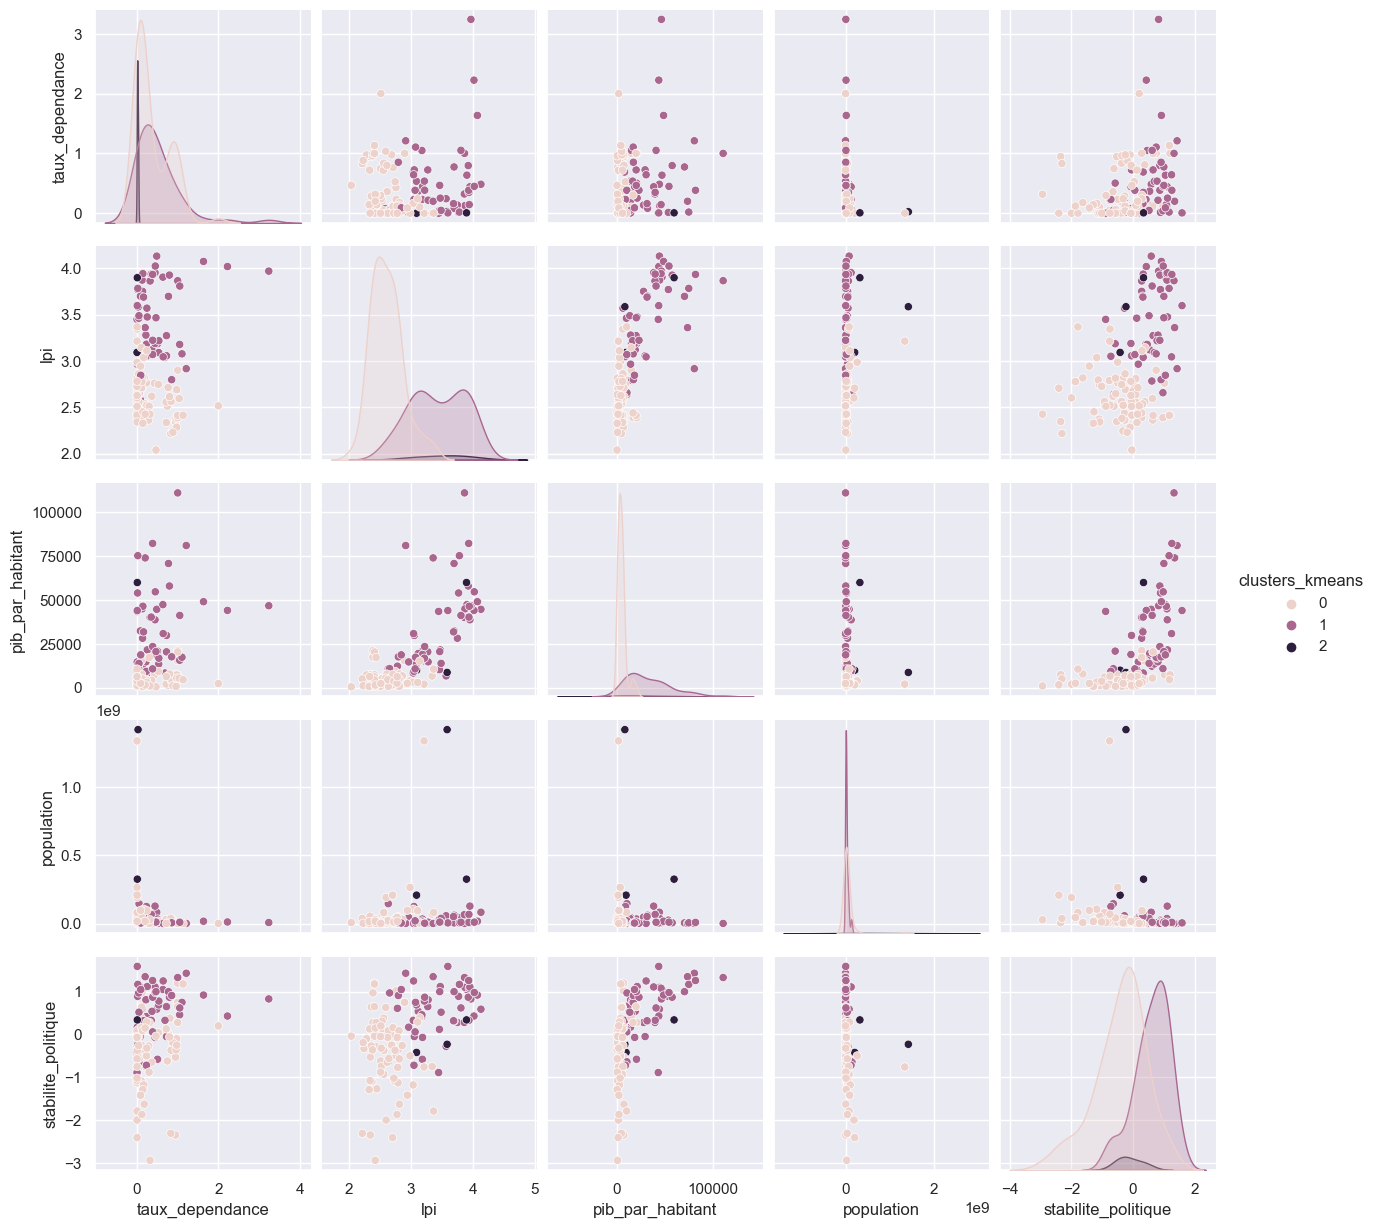

In [23]:
# visualisation des clusters pour quelques variables

colonne = ['taux_dependance', 'lpi', 'pib_par_habitant', 'population', 'stabilite_politique', 'clusters_kmeans']
sns.pairplot(df[colonne], hue='clusters_kmeans')
plt.show()

## PCA, Analyse en composantes principales

### Evaluation de la qualité de la PCA

On va mesurer l'utilité et la qualité de l'analyse en composantes principales grâce au KMO.

Le KMO indique si les variables sont assez corrélées pour faire une ACP. Un score élevé (proche de 1) indique qu'une analyse factorielle peut être utile.

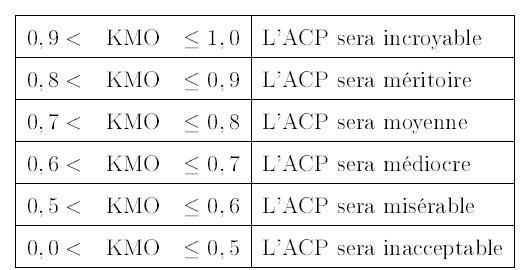

In [24]:
def kmo(dataset_corr):
    
    import numpy as np
    import math as math
    import collections
    
    r"""
    
    Parameters
    ----------
    dataset_corr : ndarray
        Array containing dataset correlation
        
    Returns
    -------
    out : namedtuple
        The function outputs the test value (value), the test value per variable (per_variable)
       
        Ex:
        Out[30]: 
        KMO_Test_Results(value=0.798844102413, 
        per_variable=
        Q1     0.812160468405
        Q2     0.774161264483
        Q3     0.786819432663
        Q4     0.766251123086
        Q5     0.800579196084
        Q6     0.842927745203 
        Q7     0.792010173432 
        Q8     0.862037322891
        Q9     0.714795031915 
        Q10    0.856497242574
        dtype: float64)
    
    References
    ----------    
    [1] Kaiser, H. F. (1970). A second generation little jiffy. Psychometrika, 35(4), 401-415.
    [2] Kaiser, H. F. (1974). An index of factorial simplicity. Psychometrika, 39(1), 31-36.
    [3] R. Sarmento and V. Costa, (2017)
    "Comparative Approaches to Using R and Python for Statistical Data Analysis", IGI-Global
    
    Examples
    --------
    illustration how to use the function.
    
    >>> kmo_test(survey_data.corr(method="spearman"))
         
        KMO_Test_Results(value=0.798844102413, 
        per_variable=
        Q1     0.812160468405
        Q2     0.774161264483
        Q3     0.786819432663
        Q4     0.766251123086
        Q5     0.800579196084
        Q6     0.842927745203 
        Q7     0.792010173432 
        Q8     0.862037322891
        Q9     0.714795031915 
        Q10    0.856497242574
        dtype: float64) 
"""
    
    

    #KMO Test
    #inverse of the correlation matrix
    corr_inv = np.linalg.inv(dataset_corr)
    nrow_inv_corr, ncol_inv_corr = dataset_corr.shape
    
    #partial correlation matrix
    A = np.ones((nrow_inv_corr,ncol_inv_corr))
    for i in range(0,nrow_inv_corr,1):
        for j in range(i,ncol_inv_corr,1):
            #above the diagonal
            A[i,j] = - (corr_inv[i,j]) / (math.sqrt(corr_inv[i,i] * corr_inv[j,j]))
            #below the diagonal
            A[j,i] = A[i,j]
    
    #transform to an array of arrays ("matrix" with Python)
    dataset_corr = np.asarray(dataset_corr)
        
    #KMO value
    kmo_num = np.sum(np.square(dataset_corr)) - np.sum(np.square(np.diagonal(dataset_corr)))
    kmo_denom = kmo_num + np.sum(np.square(A)) - np.sum(np.square(np.diagonal(A)))
    kmo_value = kmo_num / kmo_denom
    
    
    kmo_j = [None]*dataset_corr.shape[1]
    #KMO per variable (diagonal of the spss anti-image matrix)
    for j in range(0, dataset_corr.shape[1]):
        kmo_j_num = np.sum(dataset_corr[:,[j]] ** 2) - dataset_corr[j,j] ** 2
        kmo_j_denom = kmo_j_num + np.sum(A[:,[j]] ** 2) - A[j,j] ** 2
        kmo_j[j] = kmo_j_num / kmo_j_denom

    
    Result = collections.namedtuple("KMO_Test_Results", ["value", "per_variable"])   
    
    #Output of the results - named tuple    
    return Result(value=kmo_value,per_variable=kmo_j)

In [25]:
kmo(X.corr())

KMO_Test_Results(value=0.5974335197337073, per_variable=[0.4666366888916523, 0.32248594411385495, 0.5895997255605453, 0.6274561712796259, 0.4926190276848335, 0.62184258220553, 0.5350952863724906, 0.5995287046088925, 0.5577802672235435, 0.46426366603615754, 0.39569739571844875, 0.702909689730869, 0.8327758345705816, 0.8198643287426253, 0.5843951694348607, 0.7723873374916562, 0.7578491022145041, 0.7994788999330719, 0.6015828555485211])

Dans cette situation, la PCA est indiquée "misérable". 

Certaine variables devront être retirées pour les prochaines itérations.

#### KMO par variables

In [26]:
kmo_variable = pd.DataFrame(data=np.array(kmo(X.corr()).per_variable), index=X.columns.values, columns=['KMO'])
kmo_variable.sort_values('KMO', ascending = False)

KMO
pib                                      0.83
taux_droit_douane                        0.82
stabilite_politique                      0.80
cout_production_volaille                 0.77
taux_population_urbaine                  0.76
lpi                                      0.70
volaille_consommée                       0.63
taux_autosuffisance                      0.62
pib_par_habitant                         0.60
proportion_animaux_nourriture            0.60
production                               0.59
quantite_conteneurs_par_annee            0.58
population                               0.56
proportion_volaille_nourriture           0.54
taux_dependance                          0.49
exportation_volaille                     0.47
accroissement_population_moyen_par_annee 0.46
taux_accroissement_population_moyen      0.40
importation_volaille                     0.32

On pourra par exemple conserver les variables dont le KMO est supérieur ou égale à 0,6.

### PCA

In [27]:
# création de l'estimateur
pca = PCA(n_components=3)

pca.fit(X_scaled)

PCA(n_components=3)

#### Graphique éboulie des valeurs propres

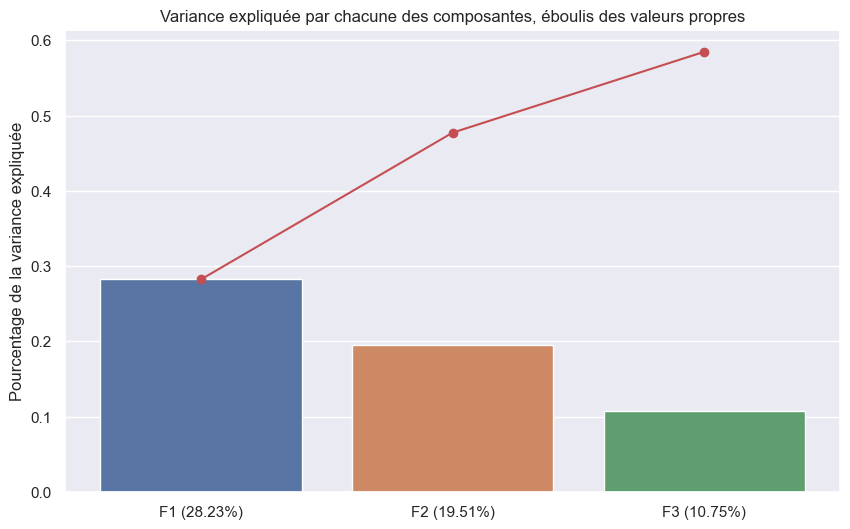

In [28]:
# explication de la variance dans chacune des composantes, éboulis des valeurs propres

cumsum_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize = (10,6))

sns.barplot(x=[n for n in range(pca.components_.shape[0])],
            y=pca.explained_variance_ratio_)

plt.plot([n for n in range(pca.components_.shape[0])], cumsum_variance, c='r', marker='o')


listF = []
for x in range(pca.components_.shape[0]):
    a = f"F{x+1} ({round(100*pca.explained_variance_ratio_[x],2)}%)"
    listF.append(a)
    
    
plt.title("Variance expliquée par chacune des composantes, éboulis des valeurs propres")
plt.ylabel("Pourcentage de la variance expliquée")
plt.xticks([n for n in range(pca.components_.shape[0])], listF);

Moins de 60% de la variance est expliquée par les 3 premières composantes principales.

On continue pour la première itération mais cela est peu pour une PCA.

#### Représentation des composantes dans les variables

In [29]:
df_composante = pd.DataFrame(data=pca.components_, index=['F1', 'F2', 'F3'], columns=variables).T
df_composante

F1    F2    F3
exportation_volaille                      0.29 -0.00  0.07
importation_volaille                      0.18 -0.16  0.08
production                                0.38  0.14  0.12
volaille_consommée                        0.39  0.15  0.13
taux_dependance                          -0.05 -0.22  0.28
taux_autosuffisance                       0.14 -0.03 -0.45
proportion_volaille_nourriture            0.03 -0.18  0.47
proportion_animaux_nourriture             0.09 -0.30  0.41
population                                0.29  0.27  0.01
accroissement_population_moyen_par_annee  0.20  0.29 -0.03
taux_accroissement_population_moyen      -0.09  0.17  0.26
lpi                                       0.26 -0.31 -0.19
pib                                       0.38  0.08  0.10
taux_droit_douane                        -0.14  0.27  0.32
quantite_conteneurs_par_annee             0.32  0.13  0.10
cout_production_volaille                 -0.20  0.05  0.25
taux_population_urbaine                   0.16 -0.33 -0.08
stabilite_politique                       0.06 -0.37  0.04
pib_par_habitant                          0.15 -0.37  0.01

In [30]:
pca.components_.shape

(3, 19)

#### Cercle des corrélations

In [31]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(20, 18))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # # Affichage du titre
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [32]:
# Plan factorielle composé de F1 et F2
# affichage des variables sur ce plan factoriel

x_y = (0,1)
features = variables

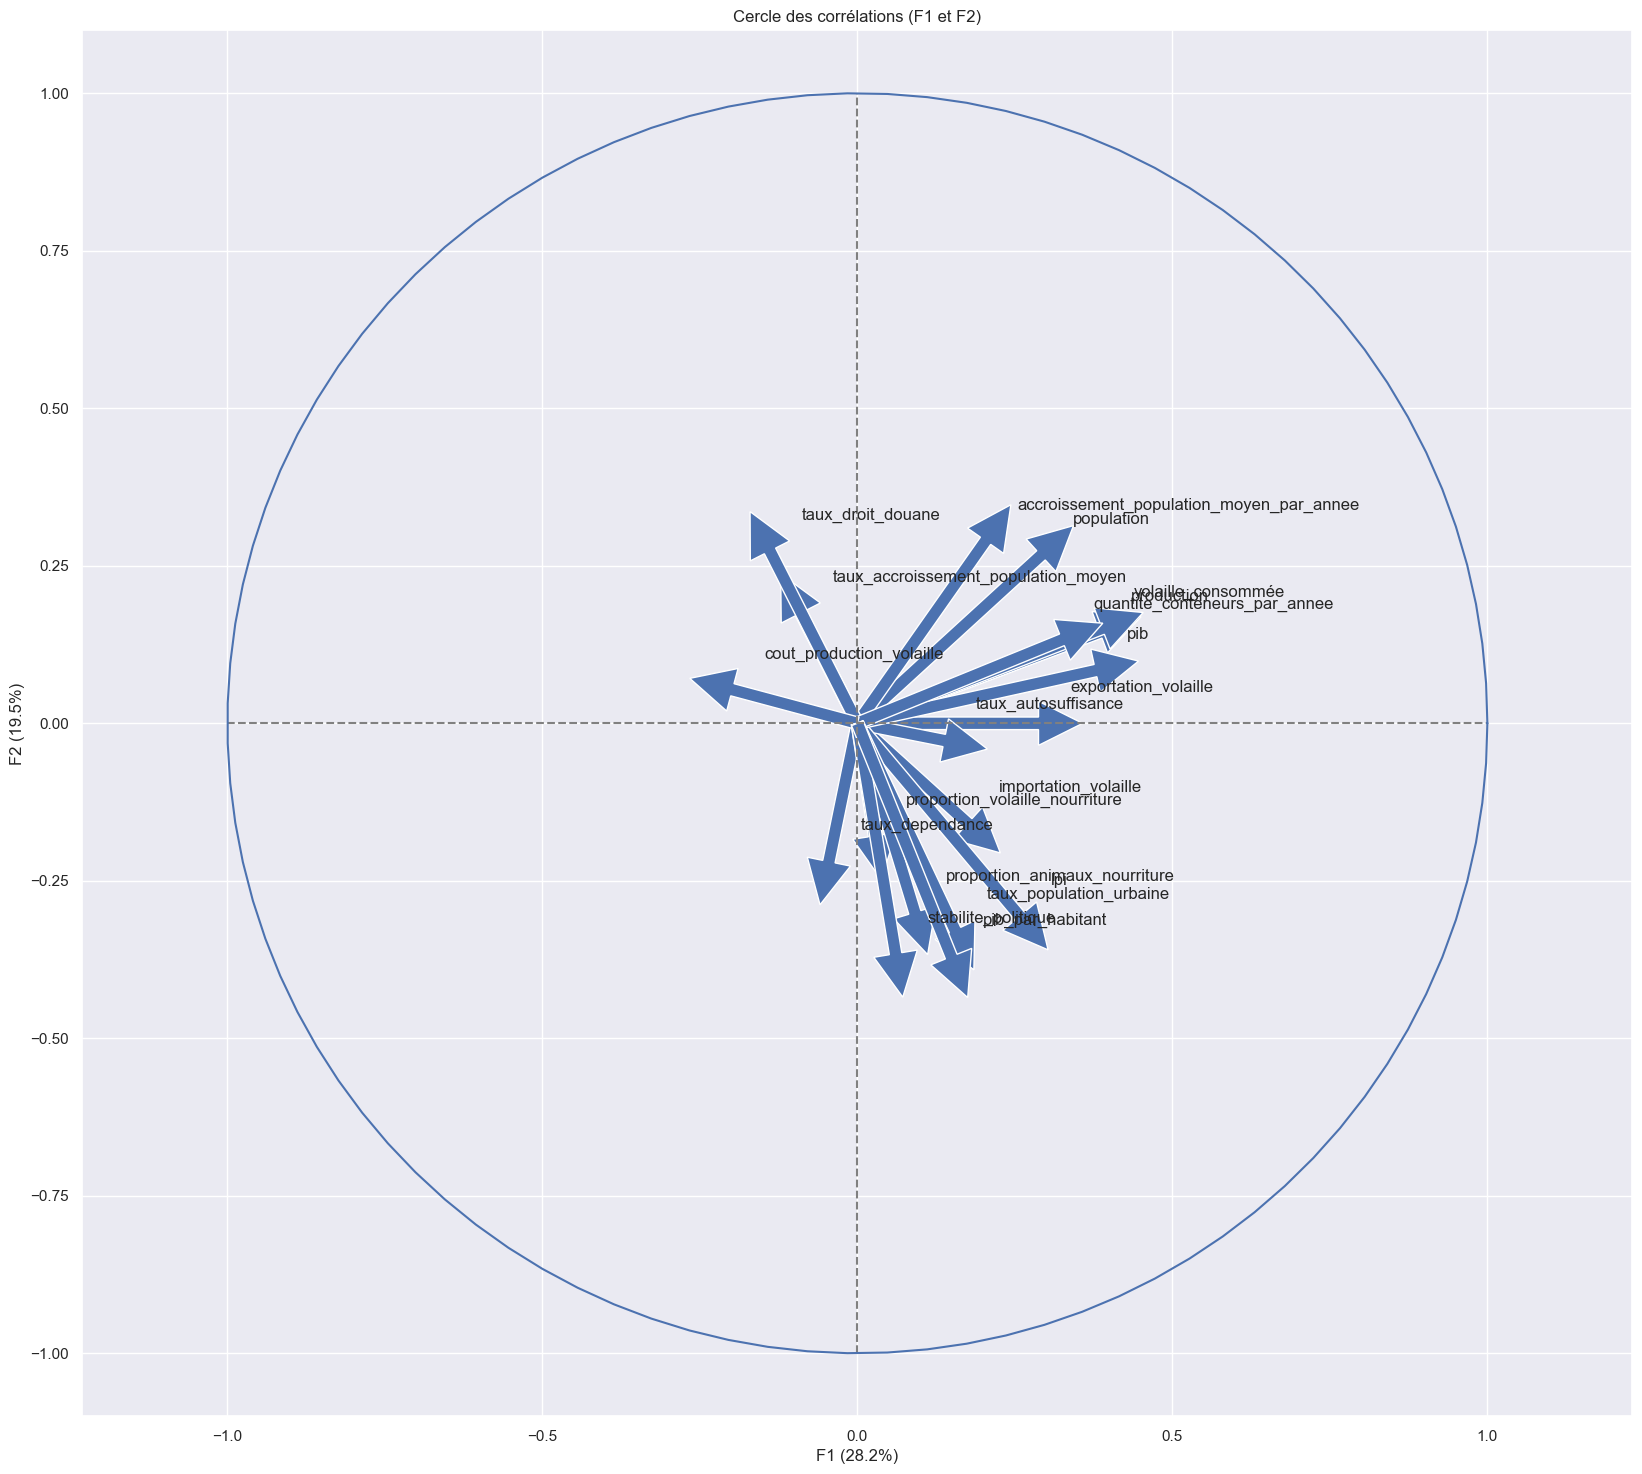

In [33]:
# affichage du cercle des corrélations selon les composantes et variables ci-dessus

correlation_graph(pca, x_y, features)

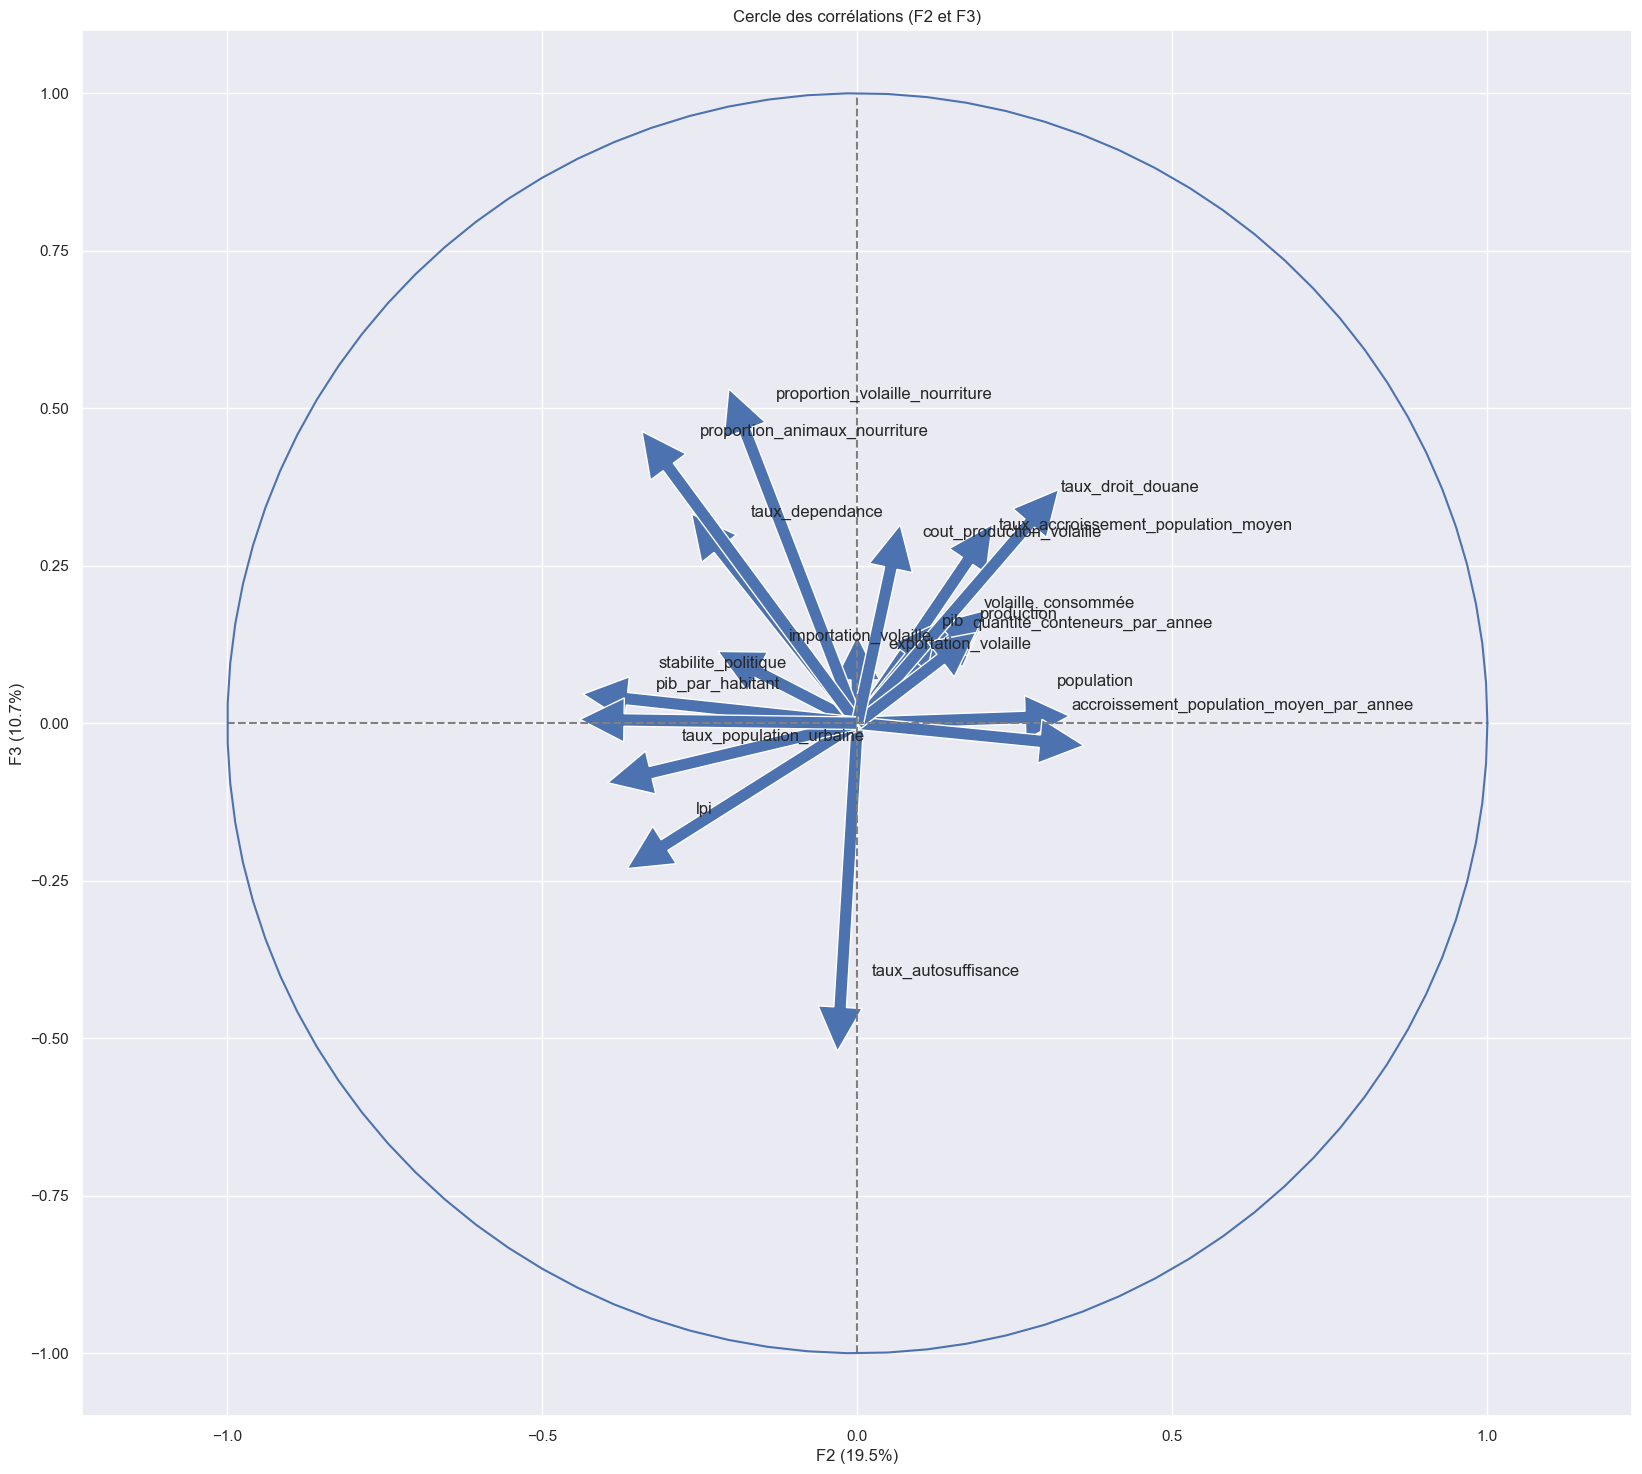

In [34]:
# Cercle des corrélation sur F2 et F3

x_y = (1,2)
correlation_graph(pca, x_y, features)

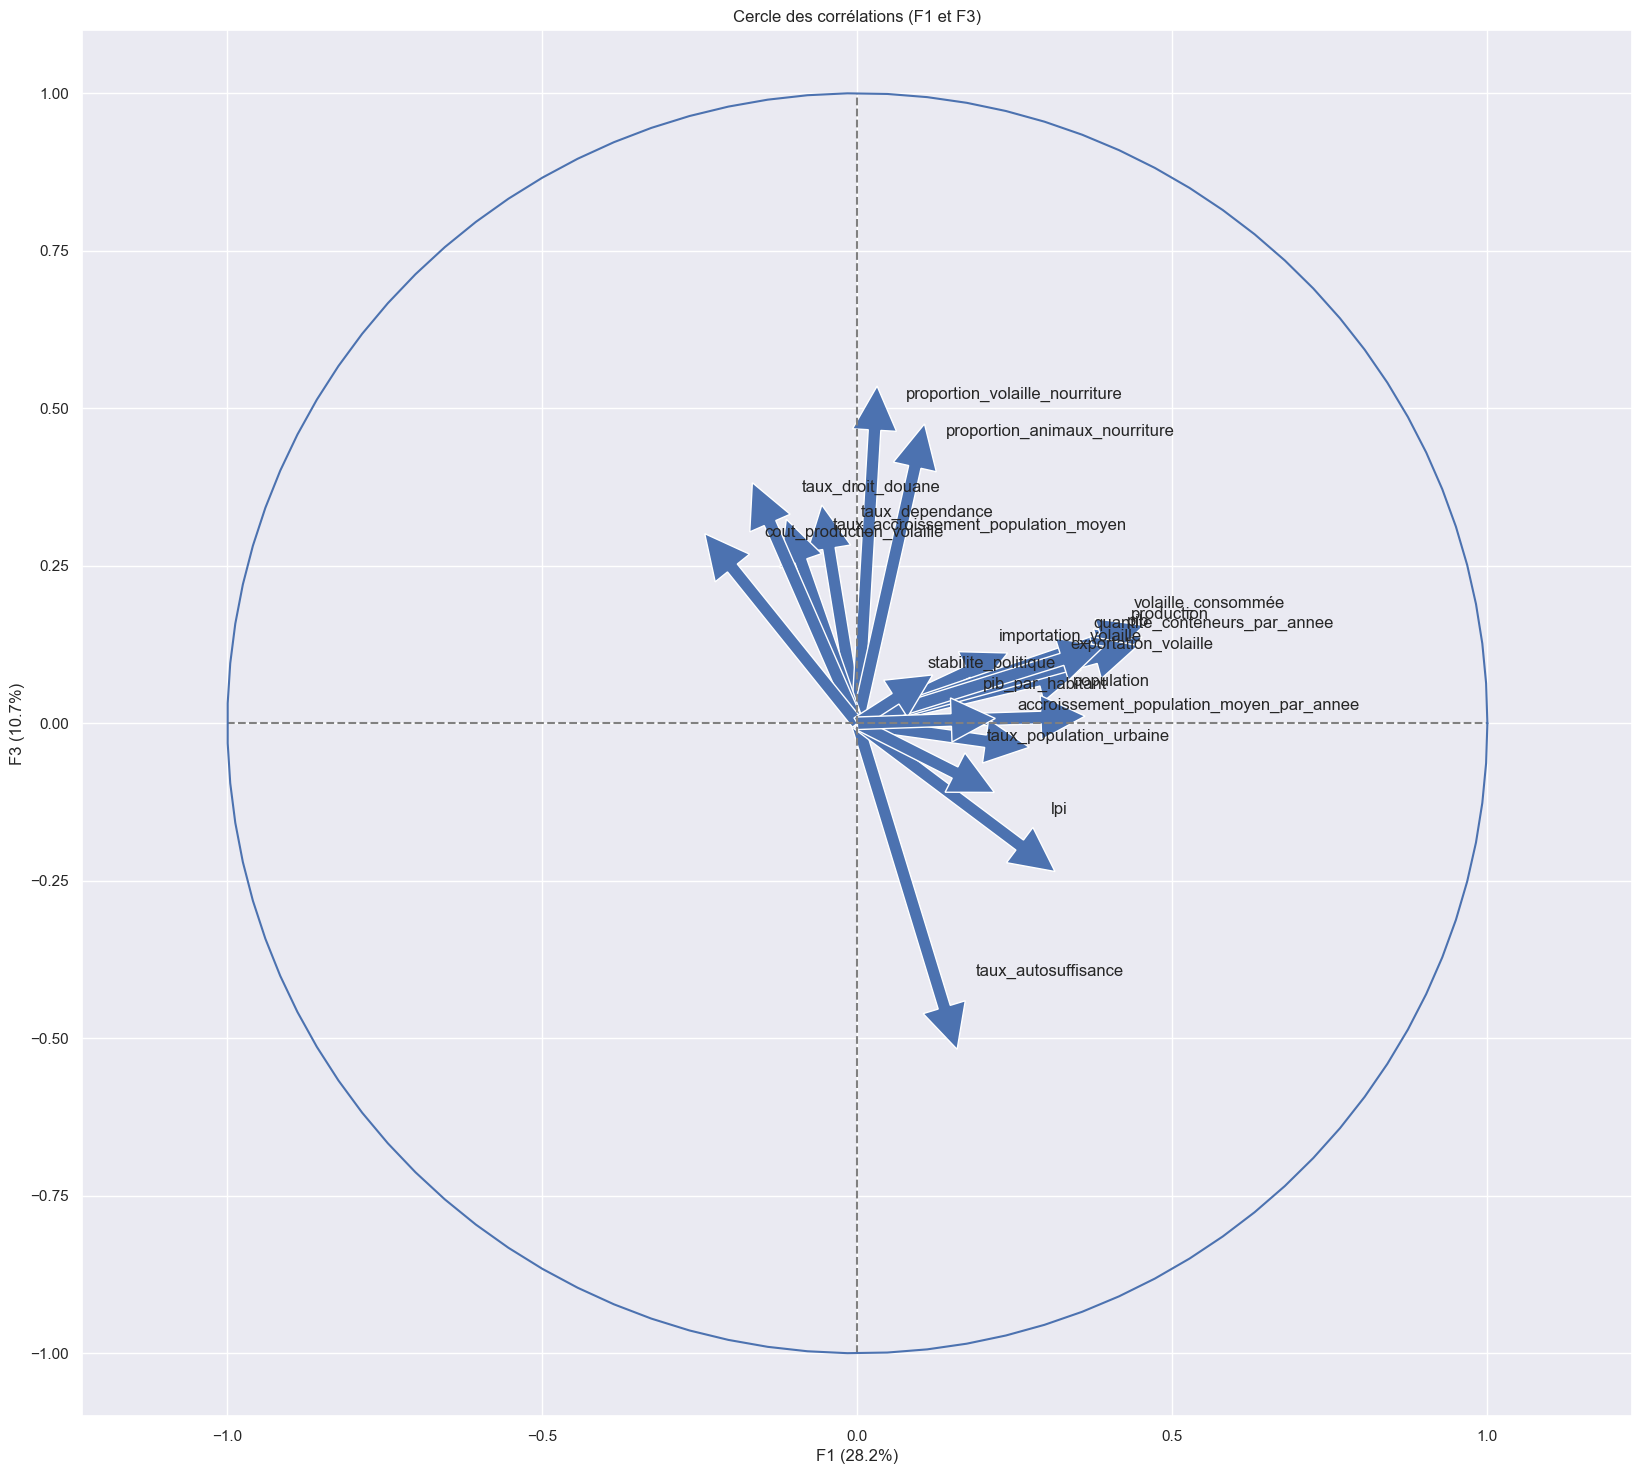

In [35]:
# Cercle des corrélation sur F1 et F3

x_y = (0,2)
correlation_graph(pca, x_y, features)

#### Représentation des individus sur le plan factoriel

In [36]:
# représenation des individus sur le plan factoriel
X_projected = pca.transform(X_scaled)

df_projection = pd.DataFrame(data=X_projected, columns=['F1', 'F2', 'F3'], index=pays)
df_projection

F1    F2    F3
Afrique du Sud                                      0.99 -0.61  0.70
Albanie                                            -0.94 -0.11 -0.97
Algérie                                            -1.02  1.89 -1.16
Allemagne                                           3.20 -2.37 -0.80
Angola                                             -1.48  1.25  1.38
Antigua-et-Barbuda                                 -1.47 -0.65  3.90
Arabie saoudite                                     0.86 -1.11  1.69
Argentine                                           0.93 -0.67  0.18
Arménie                                            -1.59  0.52 -0.01
Australie                                           1.52 -2.42 -0.19
Autriche                                            0.36 -2.06 -0.83
Azerbaïdjan                                        -1.06  1.27 -0.99
Barbade                                            -1.29 -0.17  2.25
Belgique                                            1.95 -3.18 -2.43
Belize                                             -1.60  1.30  0.74
Bolivie (État plurinational de)                    -0.87  0.23  0.71
Bosnie-Herzégovine                                 -0.43  0.49 -2.34
Botswana                                           -0.72 -0.22 -1.21
Brésil                                              6.90  1.55  1.63
Bulgarie                                           -0.39 -1.09 -0.59
Bélarus                                            -0.25 -0.30 -1.54
Bénin                                              -1.51  1.36  0.92
Cameroun                                           -1.80  2.70 -0.29
Canada                                              1.73 -2.09 -0.79
Chili                                               0.48 -1.38 -0.03
Chine - RAS de Hong-Kong                            2.10 -6.05  4.21
Chine - RAS de Macao                                0.11 -3.96  2.16
Chine, continentale                                14.99  6.99  2.08
Chypre                                             -0.59 -1.09  0.35
Colombie                                            0.06  0.61 -0.36
Congo                                              -1.72  0.75  2.09
Congo                                              -2.03  1.89  2.11
Costa Rica                                         -0.52 -0.64 -0.38
Croatie                                            -0.41 -0.75 -1.60
Côte d'Ivoire                                      -1.35  1.98 -0.77
Danemark                                            1.08 -2.91 -1.33
Dominique                                          -1.47 -0.45  1.53
El Salvador                                        -0.87  0.23 -0.85
Espagne                                             1.78 -1.49 -0.78
Estonie                                            -0.62 -1.09 -0.75
Eswatini                                           -1.55  1.29 -0.81
Fidji                                              -1.74  0.86  1.20
Finlande                                            0.83 -2.29 -2.04
France                                              2.33 -1.86 -0.92
Fédération de Russie                                1.66  0.65 -0.27
Gabon                                              -1.45  0.33  2.53
Ghana                                              -1.47  1.39  0.55
Grèce                                               0.20 -1.03 -1.83
Guatemala                                          -1.00  0.65  0.44
Guyana                                             -1.46  1.06  0.03
Géorgie                                            -0.82 -0.07 -0.74
Honduras                                           -1.22  0.97  0.20
Hongrie                                             0.49 -1.35 -1.85
Inde                                                5.00  7.14 -1.66
Indonésie                                           1.20  1.80 -1.18
Iran (République islamique d')                     -0.11  1.91  0.11
Iraq                                               -0.78  1.25  0.77
Irlande                                             

In [37]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

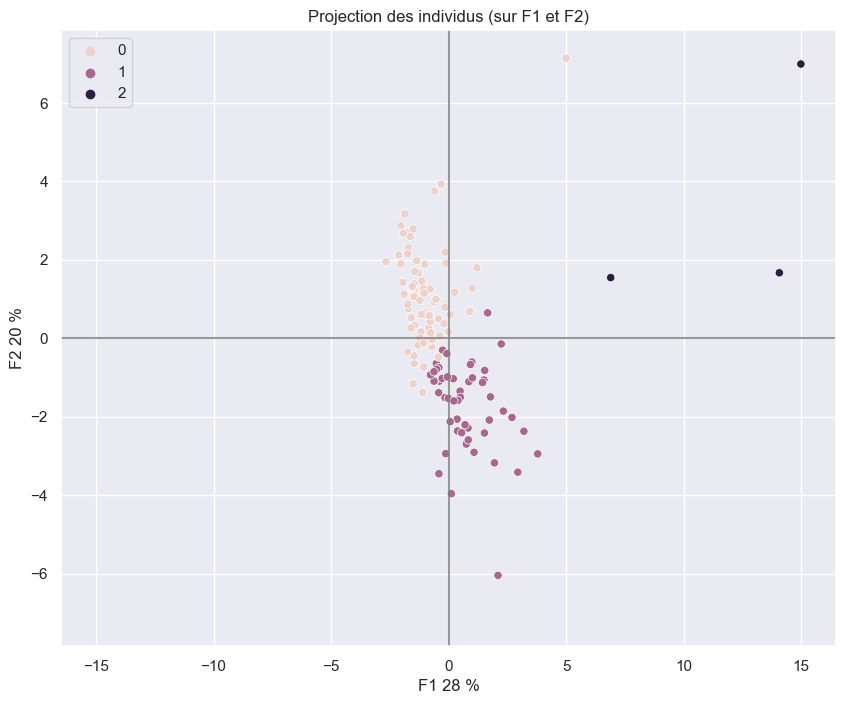

In [38]:
x_y = (0,1)

display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=pca, 
                                labels = None,
                                clusters=clusters_kmeans, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." )

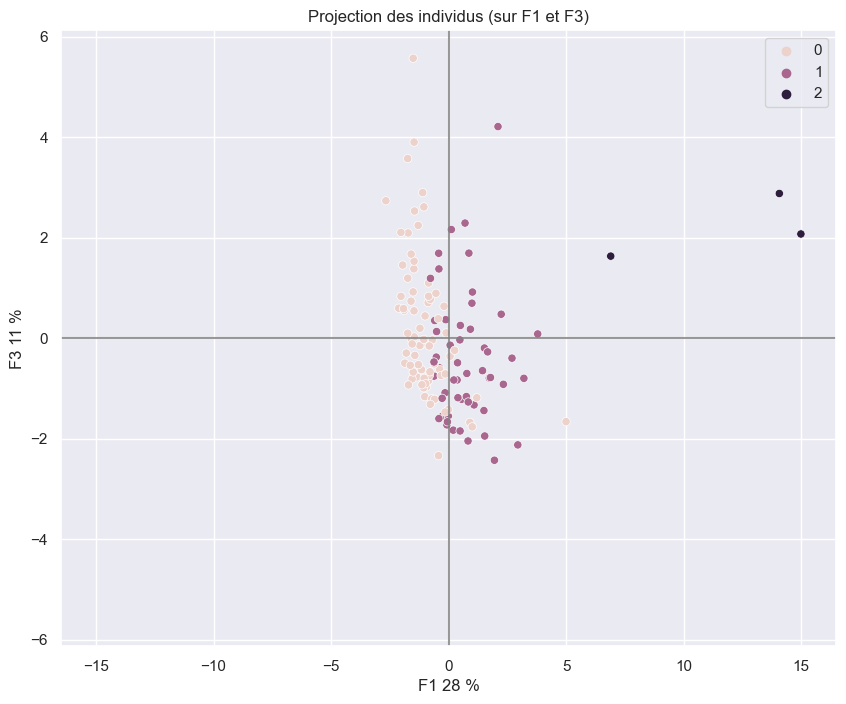

In [39]:
x_y = (0,2)

display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=pca, 
                                labels = None,
                                clusters=clusters_kmeans, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." )

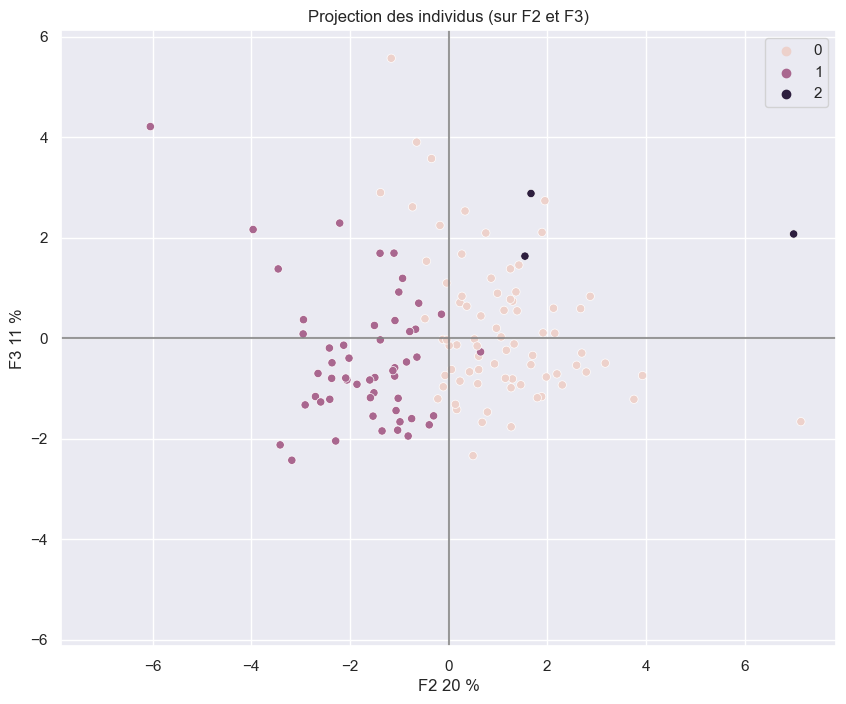

In [40]:
x_y = (1,2)

display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=pca, 
                                labels = None,
                                clusters=clusters_kmeans, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." )

#### Représentation 3D

In [41]:
import plotly.express as px

In [42]:
title = "Représentation des pays en fonction des 3 composantes principales"

In [43]:
fig = px.scatter_3d(x=X_projected[:,0], y=X_projected[:,1], z=X_projected[:, 2], hover_name=pays,
              color=clusters_cah, title=title)
fig.show()